Öncelikli olarak drive hesabımızı Colab'a baglıyoruz.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

Datasetin ve referans resmin yerini belirtiyoruz.


In [ ]:
image_directory = '/content/drive/My Drive/images/'
reference_image_path = "tshirt.jpg"
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]


In [ ]:
model = ResNet50(weights='imagenet', include_top=False)

Referans resmi işliyoruz ve öznitelik vektörünü çıkartıyoruz.

In [ ]:

img_path = reference_image_path
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

reference_features = model.predict(img_data)

1/1 [==============================] - 1s 1s/step


Datasetteki diğer resimlerle karşılaştırıyoruz. Karşılaştırma icin kosinüs benzerliğinden yararlanıyoruz. En cok benzerlik gosteren 3 resmi seciyoruz.


In [ ]:
similarities = []
for file in image_files:
    img_path = os.path.join(image_directory, file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    features = model.predict(img_data)
    similarity = cosine_similarity(features.reshape(1, -1), reference_features.reshape(1, -1))[0][0]
    similarities.append((file, similarity))

similarities.sort(key=lambda x: x[1], reverse=True)


top3_similar_images = similarities[:3]

1/1 [==============================] - 0s 22ms/step


Referans resmi ve en benzer 3 resmi gosteriyoruz.

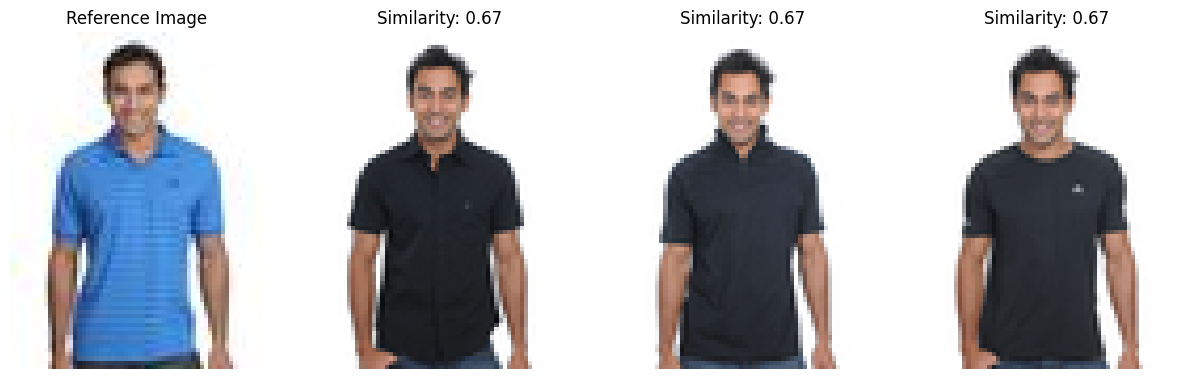

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 4, 1)
plt.imshow(image.load_img(img_path))
plt.title("Reference Image")
plt.axis('off')


for i, (image_file, _) in enumerate(top3_similar_images, 1):
    img_path = os.path.join(image_directory, image_file)
    img = image.load_img(img_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Similarity: {similarity:.2f}")
    plt.axis('off')

plt.show()